# **Importing dependencies**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# **Data Collection**

In [2]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('/content/IMDB-Movie-Data.csv')

# **Data Processing**

In [3]:
movies_data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:
movies_data.shape

(1000, 12)

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# **Data Cleaning**

In [6]:
# check the number of missing values in each column
movies_data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


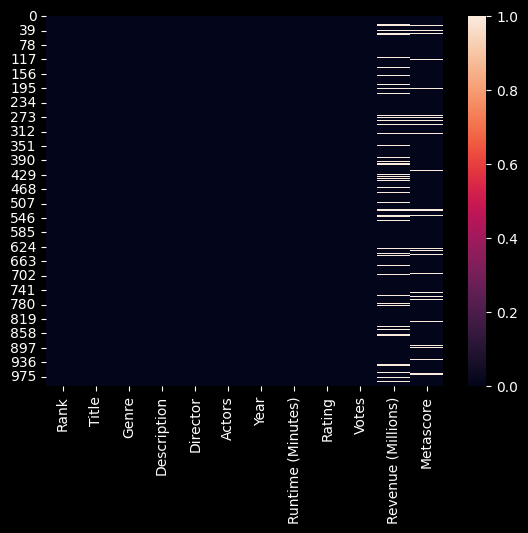

In [7]:
plt.style.use('dark_background')
sns.heatmap(movies_data.isnull())
plt.show()

#  Handling The Missing Values

In [8]:
# drop the irrelevant columns
movies_data = movies_data.drop(['Rank','Description', 'Actors'], axis=1)

In [10]:
movies_data.isnull().sum()

,0
Title,0
Genre,0
Director,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0
Revenue (Millions),128
Metascore,64


In [11]:
movies_data = movies_data.dropna(subset=['Rating'])


In [12]:
# Fill missing values with mean
movies_data['Revenue (Millions)'] = movies_data['Revenue (Millions)'].fillna(movies_data['Revenue (Millions)'].mean())
movies_data['Metascore'] = movies_data['Metascore'].fillna(movies_data['Metascore'].mean())


In [13]:
movies_data.isnull().sum()

,0
Title,0
Genre,0
Director,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0
Revenue (Millions),0
Metascore,0


# Check For Duplicate Data

In [14]:
dup_data = movies_data.duplicated().any()
print("Are there any duplicated values in data ?" ,dup_data)

Are there any duplicated values in data ? False


# **Data Analysis**

In [15]:
movies_data.describe()


,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Visualization

# Find Average Rating of Movies Year-wise

In [16]:
movies_data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

,Rating
Year,
2007,7.133962
2006,7.125000
2009,6.960784
2012,6.925000
2011,6.838095
2014,6.837755
2010,6.826667
2013,6.812088
2008,6.784615


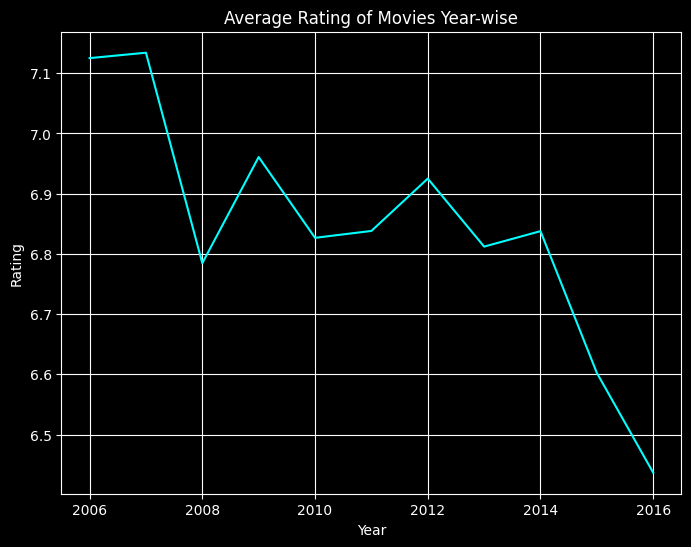

In [17]:
avg_rating_year = movies_data.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y = 'Rating', data=avg_rating_year, color='cyan')
plt.title("Average Rating of Movies Year-wise", color='white')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


# Display Title of The Movie Having Runtime >= 180 Minutes

In [18]:
movies_data[movies_data['Runtime (Minutes)'] >= 180]['Title']

,Title
82,The Wolf of Wall Street
88,The Hateful Eight
311,La vie d'Adèle
828,Grindhouse
965,Inland Empire


# Find The Average Rating For Each Director


In [19]:
movies_data.groupby('Director')['Rating'].mean().sort_values(ascending=False)


,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Florian Henckel von Donnersmarck,8.50
...,...
Micheal Bafaro,3.50
Jonathan Holbrook,3.20
Shawn Burkett,2.70


# Display Top 10 Lengthy Movies Title and Runtime

In [20]:
top10_len = movies_data.nlargest(10 , 'Runtime (Minutes)') [['Title' , 'Runtime (Minutes)']]\
.set_index('Title')

In [21]:
print(top10_len)

                                          Runtime (Minutes)
Title                                                      
Grindhouse                                              191
The Hateful Eight                                       187
The Wolf of Wall Street                                 180
La vie d'Adèle                                          180
Inland Empire                                           180
Cloud Atlas                                             172
3 Idiots                                                170
Interstellar                                            169
Pirates of the Caribbean: At World's End                169
The Hobbit: An Unexpected Journey                       169


/tmp/ipython-input-3735786308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Runtime (Minutes)' , y=top10_len.index , data=top10_len, palette='Set1')


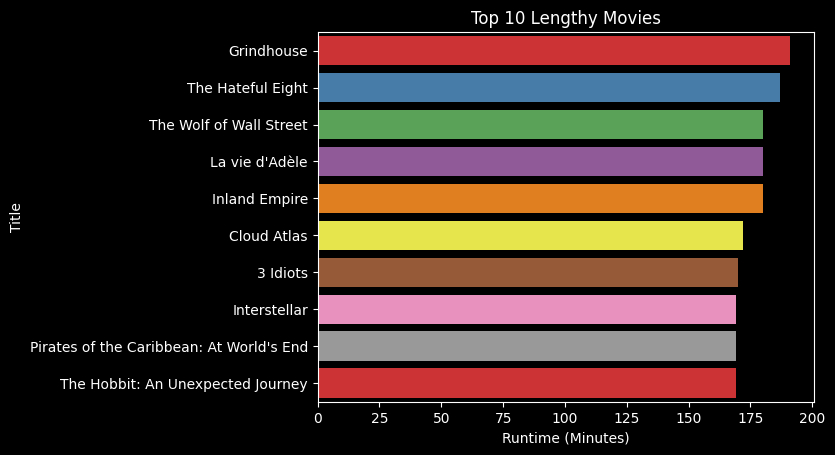

In [22]:
plt.style.use('dark_background')
sns.barplot(x= 'Runtime (Minutes)' , y=top10_len.index , data=top10_len, palette='Set1')
plt.title("Top 10 Lengthy Movies")
plt.show()


# Display Number of Movies Per Year

In [23]:
movies_data['Year'].value_counts()

,count
Year,
2016,297
2015,127
2014,98
2013,91
2012,64
2011,63
2010,60
2007,53
2008,52


/tmp/ipython-input-3284279277.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=movies_data,palette= 'husl')


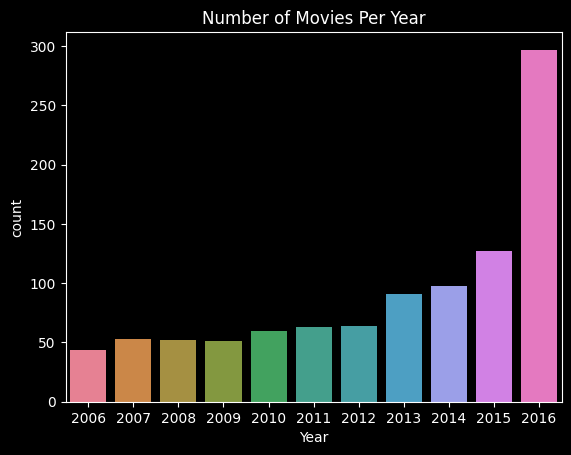

In [24]:
sns.countplot(x='Year',data=movies_data,palette= 'husl')
plt.title("Number of Movies Per Year")
plt.show()

# Display Top 10 Highest Rated Movie Titles And its Directors


In [25]:
top10_len=movies_data.nlargest(10,'Rating')[['Title','Rating','Director']]\
.set_index('Title')

In [26]:
print(top10_len)

                       Rating           Director
Title                                           
The Dark Knight           9.0  Christopher Nolan
Inception                 8.8  Christopher Nolan
Dangal                    8.8      Nitesh Tiwari
Interstellar              8.6  Christopher Nolan
Kimi no na wa             8.6     Makoto Shinkai
The Intouchables          8.6    Olivier Nakache
The Prestige              8.5  Christopher Nolan
The Departed              8.5    Martin Scorsese
The Dark Knight Rises     8.5  Christopher Nolan
Whiplash                  8.5    Damien Chazelle


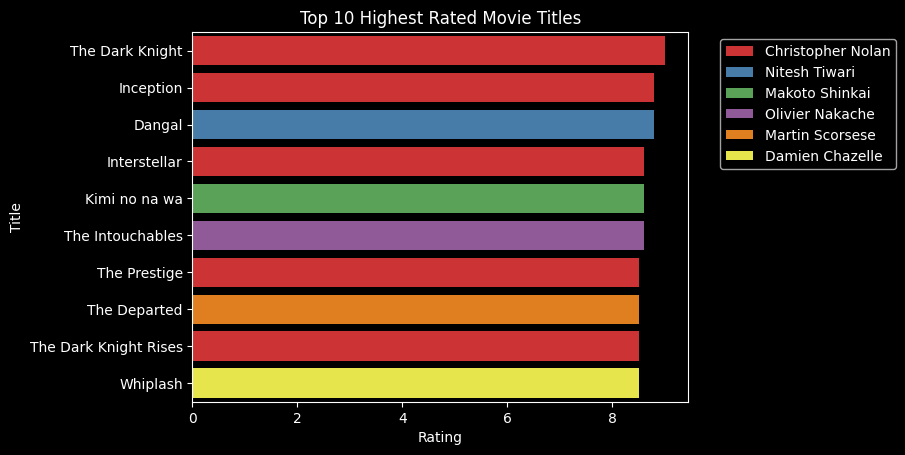

In [27]:
sns.barplot(x= 'Rating' , y=top10_len.index , data=top10_len, hue = 'Director' , dodge= False , palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Top 10 Highest Rated Movie Titles")
plt.show()

# Most Common Movie Genres

In [28]:
plt.style.use('dark_background')


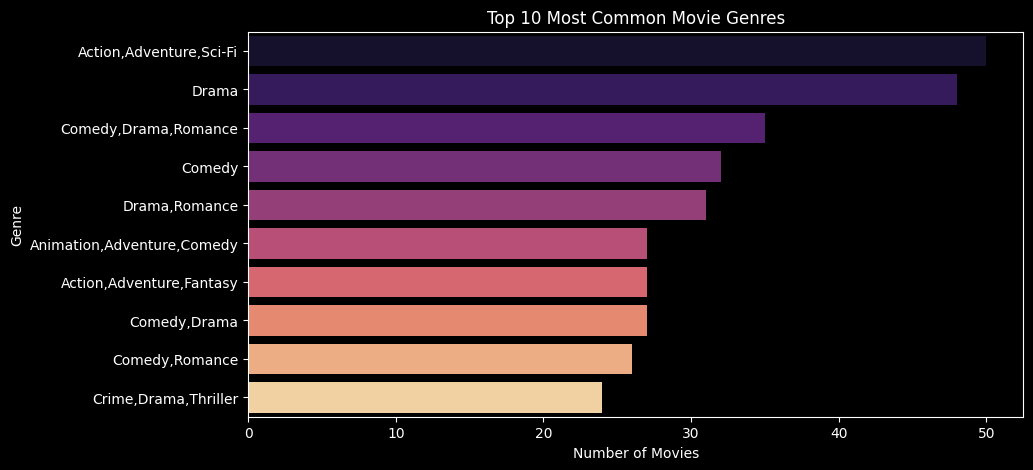

In [29]:
genre_counts = movies_data['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index,hue= genre_counts.index, palette='magma',legend=False)
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


# How Many Films of Each Genre Were Made?

In [30]:
all_genres = []

for genre_list in movies_data['Genre'].dropna():

    for g in genre_list.split(','):
        all_genres.append(g.strip())


genre_counts = Counter(all_genres)
genre_counts

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})

# Votes vs Rating

In [31]:
movies_data.columns

Index(['Title', 'Genre', 'Director', 'Year', 'Runtime (Minutes)', 'Rating',
       'Votes', 'Revenue (Millions)', 'Metascore'],
      dtype='object')

In [32]:
movies_data.groupby('Votes')['Rating'].mean().sort_values(ascending=False)


,Rating
Votes,
1791916,9.0
1583625,8.8
48969,8.8
557965,8.6
34110,8.6
...,...
202,3.5
173,3.2
496,2.7


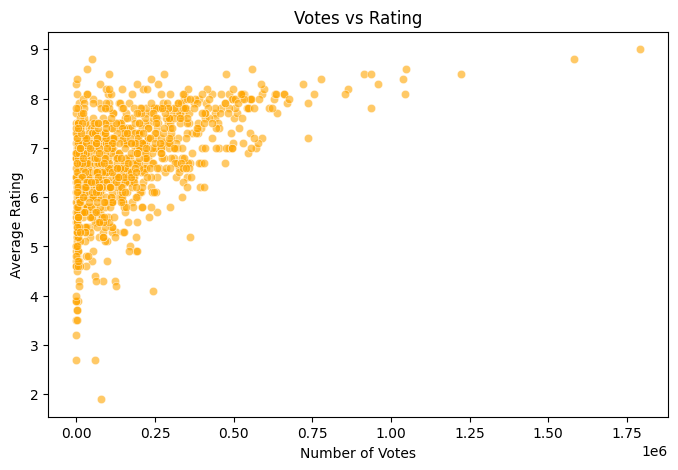

In [40]:
plt.style.use('default')
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Rating', data=movies_data, alpha=0.6, color='orange')
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.show()

# Runtime (Minutes) VS Rating

In [36]:
movies_data.groupby('Runtime (Minutes)')['Rating'].mean().sort_values(ascending=False)

,Rating
Runtime (Minutes),
164,8.500000
152,8.400000
170,8.400000
159,8.300000
153,8.025000
...,...
87,5.811111
90,5.766667
145,5.500000


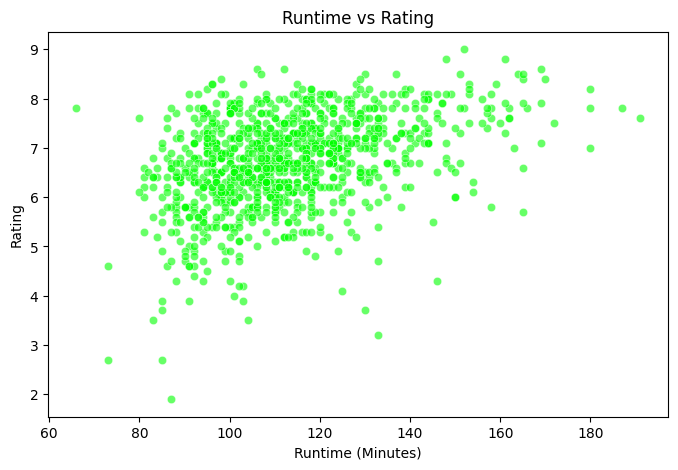

In [39]:
plt.style.use('default')
plt.figure(figsize=(8,5))
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=movies_data, alpha=0.6, color='lime')
plt.title("Runtime vs Rating")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Rating")
plt.show()


## Classify Movies Based on Ratings [Excellent,Good and Average]


In [41]:
def Rating(rating):
  if rating >= 7.0:
      return 'Excellent'
  elif rating > 6.0:
     return 'Good'
  else:
     return 'Average'

In [42]:
movies_data['rating_cat']=movies_data['Rating'].apply(Rating)

In [43]:
movies_data.head(10)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.130000,76.0,Excellent
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.460000,65.0,Excellent
2,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.120000,62.0,Excellent
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.320000,59.0,Excellent
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.020000,40.0,Good
5,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,2016,103,6.1,56036,45.130000,42.0,Good
6,La La Land,"Comedy,Drama,Music",Damien Chazelle,2016,128,8.3,258682,151.060000,93.0,Excellent
7,Mindhorn,Comedy,Sean Foley,2016,89,6.4,2490,82.956376,71.0,Good
8,The Lost City of Z,"Action,Adventure,Biography",James Gray,2016,141,7.1,7188,8.010000,78.0,Excellent
9,Passengers,"Adventure,Drama,Romance",Morten Tyldum,2016,116,7.0,192177,100.010000,41.0,Excellent


## In Which Year There Was The Highest Voting?

In [44]:
movies_data.columns

Index(['Title', 'Genre', 'Director', 'Year', 'Runtime (Minutes)', 'Rating',
       'Votes', 'Revenue (Millions)', 'Metascore', 'rating_cat'],
      dtype='object')

In [45]:
movies_data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

,Votes
Year,
2012,285226.093750
2008,275505.384615
2006,269289.954545
2009,255780.647059
2010,252782.316667
2007,244331.037736
2011,240790.301587
2013,219049.648352
2014,203930.224490


In [70]:
plt.style.use('dark_background')

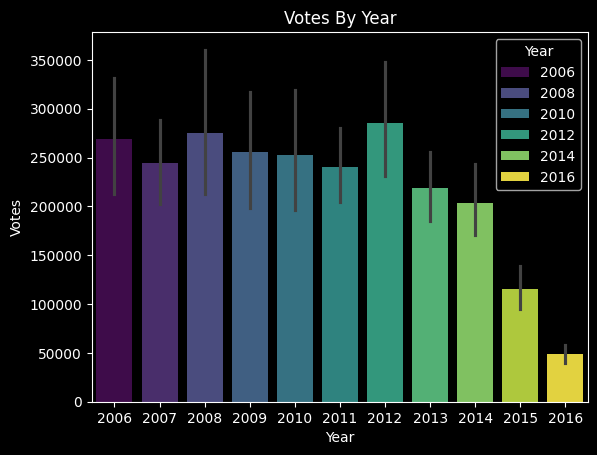

In [71]:
sns.barplot( data = movies_data ,x ='Year' , y="Votes" ,hue='Year',palette="viridis")
plt.title("Votes By Year")
plt.show()

# In Which Year There Was The Highest Revenue?

In [48]:
movies_data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

,Revenue (Millions)
Year,
2009,110.276186
2012,107.973281
2010,103.975319
2008,98.772623
2011,87.538355
2007,87.510481
2013,86.984496
2006,86.144835
2014,84.992097


In [49]:
plt.style.use('dark_background')


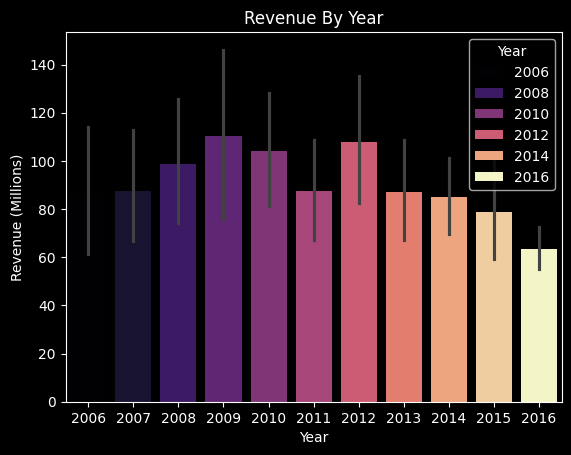

In [50]:
sns.barplot(x= 'Year',y='Revenue (Millions)',data=movies_data ,hue='Year', palette="magma")
plt.title("Revenue By Year")
plt.show()

# **Data Preprocessing**

## Encode Categorical Columns

In [52]:
le = LabelEncoder()

# Encoding Columns
movies_data['Genre'] = le.fit_transform(movies_data['Genre'])
movies_data['Director'] = le.fit_transform(movies_data['Director'])


##Separating Features & target


In [53]:
X = movies_data[['Genre', 'Director', 'Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']]
Y = movies_data['Rating']


In [54]:
print(X)

     Genre  Director  Year  Runtime (Minutes)   Votes  Revenue (Millions)  \
0       11       265  2014                121  757074          333.130000   
1       85       518  2012                124  485820          126.460000   
2      195       391  2016                117  157606          138.120000   
3       92       105  2016                108   60545          270.320000   
4        7       136  2016                123  393727          325.020000   
..     ...       ...   ...                ...     ...                 ...   
995    144        69  2015                111   27585           82.956376   
996    190       176  2007                 94   73152           17.540000   
997    170       324  2008                 98   70699           58.010000   
998     61       549  2014                 93    4881           82.956376   
999    121        59  2016                 87   12435           19.640000   

     Metascore  
0         76.0  
1         65.0  
2         62.0  
3      

In [55]:
print(Y)

0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
      ... 
995    6.2
996    5.5
997    6.2
998    5.6
999    5.3
Name: Rating, Length: 1000, dtype: float64


##Splitting the data into Training data & Test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [57]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 7) (800, 7) (200, 7)


In [58]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1000,) (800,) (200,)


# **Model Training**

# Random Forest Regressor

In [59]:
model = RandomForestRegressor()

In [60]:
# training the RandomForestRegressor model with training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# **Model Evaluation**

## Prediction

In [67]:
y_pred = rf_model.predict(X_test)

In [68]:
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)


In [69]:
# evaluation for training data
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)


# evaluation for testing data
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

print("Training RMSE:", rmse_train, " | Training R²:", r2_train)
print("Testing  RMSE:", rmse_test, " | Testing  R²:", r2_test)

Training RMSE: 0.241437639464107  | Training R²: 0.9333481209751924
Testing  RMSE: 0.6551420876420627  | Testing  R²: 0.552235265459583


In [64]:
plt.style.use('dark_background')

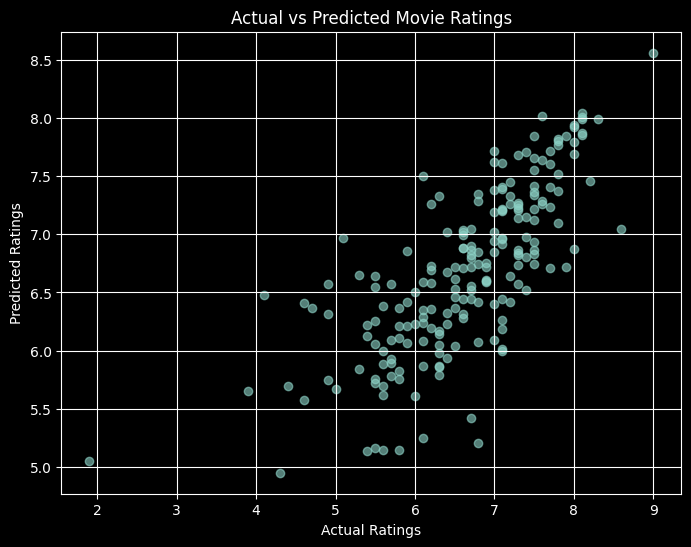

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()
